In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import seaborn as sns; sns.set(style="ticks", color_codes="pastel")
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss


def stdscaler(df):
    scaler = StandardScaler()
    scaler.fit(df)
    scX_df = scaler.transform(df)
    df=pd.DataFrame(scX_df, index =df.index,columns =df.columns  )
    return df


import time

def kfoldtest(kfoldn,model,Xtrain_df,ytrain_df):
    kf=StratifiedKFold(n_splits=kfoldn)
    accu=[]
    auc=[]
    f1 =[]
    aab =[]
    dcd = []
    tim = []
    kf.get_n_splits(Xtrain_df,ytrain_df)
    
    for train_index, test_index in kf.split(Xtrain_df,ytrain_df):
        #print("TRAIN:", len(train_index), "TEST:", len(test_index))
        t1 =time.time()
        X_train, X_test = Xtrain_df.iloc[train_index], Xtrain_df.iloc[test_index]
        y_train, y_test = ytrain_df.iloc[train_index], ytrain_df.iloc[test_index]
        model.fit(X_train,y_train)
        try:
            accu.append(model.score(X_test,y_test))
        except:
            print("This model have no build-in score.")
            
        auc.append(roc_auc_score(y_test,model.predict(X_test)))
        f1.append(f1_score(y_test, model.predict(X_test).astype(int),average='binary'))
        tim.append(time.time()-t1)
        cm1=confusion_matrix(test_y, clf.predict(test_data),labels = [1,0])
        sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        aab.append(sensitivity1)

        specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        dcd.append(specificity1)
    return accu,auc,f1,aab,dcd,tim

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
file_name = 'UCI_Credit_Card 2.csv'
data =pd.read_csv(file_name,index_col = 0)
print(data.columns)


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')


In [2]:
v1 = data[data["default.payment.next.month"]==1].copy()
v0 = data[data["default.payment.next.month"]==0].copy()
v1.rename(columns={"default.payment.next.month": "default"},inplace = True)
v0.rename(columns={"default.payment.next.month": "default"},inplace = True)
y1 = v1["default"].copy()
x1 = v1.copy()
del x1["default"]
y0 = v0["default"].copy()
x0 = v0.copy()
del x0["default"]

tr1,te1,try1,tey1 = train_test_split(
    x1, y1, test_size=0.20, random_state=42)
tr2,te2,try2,tey2 = train_test_split(
    x0, y0, test_size=0.20, random_state=42)
####
#tr2=tr2.sample(len(tr1.index))

#try2 = try2.loc[tr2.index].copy()
####


train_data=pd.concat([tr1,tr2],axis=0)

train_y = pd.concat([try1,try2],axis=0)
test_data=pd.concat([te1,te2],axis=0)

test_y = pd.concat([tey1,tey2],axis=0)


train_data = stdscaler(train_data )
test_data = stdscaler(test_data )
muholder= []
nameholder= []

In [3]:


#clf = DecisionTreeClassifier(max_depth=None,class_weight="balanced",random_state=0)
clf = tree.DecisionTreeClassifier(max_depth=10,class_weight="balanced",random_state=0)
clf.fit(train_data,train_y)
#print(clf.score(test_data,test_y))
#print(f1_score(y_true = test_y, y_pred = clf.predict(test_data)))
print(classification_report(test_y, clf.predict(test_data), labels=[1,0]))
#muholder.append([fpr, tpr])
fpr, tpr, thresholds = metrics.roc_curve(test_y, clf.predict_proba(test_data)[:,1], pos_label=1)
muholder.append([fpr, tpr])
nameholder.append('DTC'+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
print(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
#tree.plot_tree(clf)

#confusion_matrix(test_y, clf.predict(test_data),labels = [1,0])


              precision    recall  f1-score   support

           1       0.42      0.55      0.48      1328
           0       0.86      0.79      0.82      4673

    accuracy                           0.73      6001
   macro avg       0.64      0.67      0.65      6001
weighted avg       0.76      0.73      0.75      6001

DTC area=0.66


In [4]:
"""import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph"""

'import graphviz \ndot_data = tree.export_graphviz(clf, out_file=None) \ngraph = graphviz.Source(dot_data)\ngraph'

In [5]:
clf=LogisticRegression(tol=0.01, C=1,solver='lbfgs', max_iter=10000,)
clf.fit(train_data,train_y)
print(clf.score(test_data,test_y))
#print(list(clf.predict(test_data)))
print(f1_score(y_true = test_y, y_pred = clf.predict(test_data)))
print(classification_report(test_y, clf.predict(test_data), labels=[1,0]))
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, clf.predict(test_data), labels=[1,0])


fpr, tpr, thresholds = metrics.roc_curve(test_y, clf.predict_proba(test_data)[:,1], pos_label=1)
muholder.append([fpr, tpr])
nameholder.append(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
print(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])




0.8085319113481086
0.3519458544839255
              precision    recall  f1-score   support

           1       0.70      0.23      0.35      1328
           0       0.82      0.97      0.89      4673

    accuracy                           0.81      6001
   macro avg       0.76      0.60      0.62      6001
weighted avg       0.79      0.81      0.77      6001

LRC area=0.60


In [6]:
clf = GaussianNB(priors=None, var_smoothing=1e-09)
clf.fit(train_data,train_y)
print(clf.score(test_data,test_y))
#print(list(clf.predict(test_data)))
print(f1_score(y_true = test_y, y_pred = clf.predict(test_data)))
print(classification_report(test_y, clf.predict(test_data), labels=[1,0]))
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, clf.predict(test_data), labels=[1,0])

fpr, tpr, thresholds = metrics.roc_curve(test_y, clf.predict_proba(test_data)[:,1], pos_label=1)
muholder.append([fpr, tpr])
nameholder.append(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
print(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])


0.7403766038993501
0.5063371356147022
              precision    recall  f1-score   support

           1       0.44      0.60      0.51      1328
           0       0.87      0.78      0.82      4673

    accuracy                           0.74      6001
   macro avg       0.66      0.69      0.67      6001
weighted avg       0.78      0.74      0.75      6001

GNB area=0.69


In [7]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

clf.fit(train_data,train_y)
print(clf.score(test_data,test_y))
#print(list(clf.predict(test_data)))
print(f1_score(y_true = test_y, y_pred = clf.predict(test_data)))
print(classification_report(test_y, clf.predict(test_data), labels=[1,0]))
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, clf.predict(test_data), labels=[1,0])
fpr, tpr, thresholds = metrics.roc_curve(test_y, clf.predict_proba(test_data)[:,1], pos_label=1)
muholder.append([fpr, tpr])
nameholder.append(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
print(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])


0.816863856023996
0.45350571854798605
              precision    recall  f1-score   support

           1       0.67      0.34      0.45      1328
           0       0.84      0.95      0.89      4673

    accuracy                           0.82      6001
   macro avg       0.75      0.65      0.67      6001
weighted avg       0.80      0.82      0.79      6001

RFC area=0.64


In [8]:
clf=MLPClassifier(activation='tanh', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=3000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
clf.fit(train_data,train_y)
print(clf.score(test_data,test_y))
#print(list(clf.predict(test_data)))
print(f1_score(y_true = test_y, y_pred = clf.predict(test_data)))
print(classification_report(test_y, clf.predict(test_data), labels=[1,0]))
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, clf.predict(test_data), labels=[1,0])
fpr, tpr, thresholds = metrics.roc_curve(test_y, clf.predict_proba(test_data)[:,1], pos_label=1)
muholder.append([fpr, tpr])
nameholder.append(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
print(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])


0.8128645225795701
0.44977951984321407
              precision    recall  f1-score   support

           1       0.64      0.35      0.45      1328
           0       0.84      0.95      0.89      4673

    accuracy                           0.81      6001
   macro avg       0.74      0.65      0.67      6001
weighted avg       0.79      0.81      0.79      6001

MLP area=0.64


In [9]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         
                                                         random_state=0,
                                                         splitter='random'),
                   learning_rate=1.0, n_estimators=20, random_state=None)

clf.fit(train_data,train_y)
print(clf.score(test_data,test_y))
#print(list(clf.predict(test_data)))
print(f1_score(y_true = test_y, y_pred = clf.predict(test_data)))
print(classification_report(test_y, clf.predict(test_data), labels=[1,0]))
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, clf.predict(test_data), labels=[1,0])
fpr, tpr, thresholds = metrics.roc_curve(test_y, clf.predict_proba(test_data)[:,1], pos_label=1)
muholder.append([fpr, tpr])
nameholder.append(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
print(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])


0.7795367438760207
0.3866481223922114
              precision    recall  f1-score   support

           1       0.50      0.31      0.39      1328
           0       0.82      0.91      0.87      4673

    accuracy                           0.78      6001
   macro avg       0.66      0.61      0.63      6001
weighted avg       0.75      0.78      0.76      6001

ABC area=0.61


In [10]:
clf= GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, 
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
clf.fit(train_data,train_y)
print(clf.score(test_data,test_y))
#print(list(clf.predict(test_data)))
print(f1_score(y_true = test_y, y_pred = clf.predict(test_data)))
print(classification_report(test_y, clf.predict(test_data), labels=[1,0]))
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, clf.predict(test_data), labels=[1,0])
fpr, tpr, thresholds = metrics.roc_curve(test_y, clf.predict_proba(test_data)[:,1], pos_label=1)
muholder.append([fpr, tpr])
nameholder.append(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])
print(''.join([c for c in str(clf) if c.isupper()])[:3]+' area='+str(roc_auc_score(test_y, clf.predict(test_data)))[:4])


0.7890351608065322
0.1800518134715026
              precision    recall  f1-score   support

           1       0.64      0.10      0.18      1328
           0       0.79      0.98      0.88      4673

    accuracy                           0.79      6001
   macro avg       0.72      0.54      0.53      6001
weighted avg       0.76      0.79      0.72      6001

GBC area=0.54


7


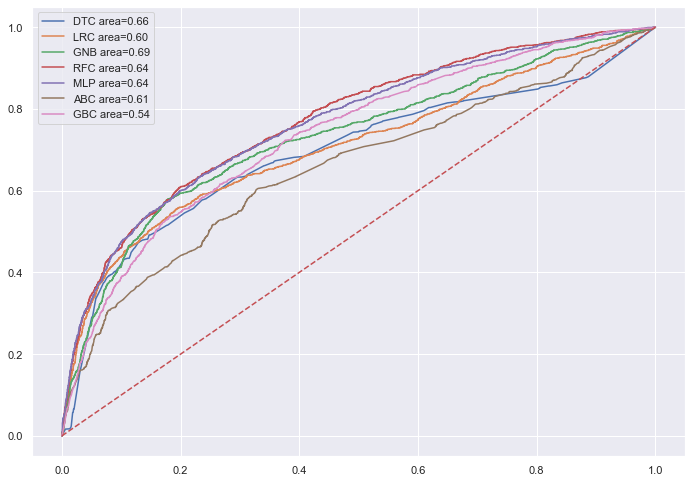

In [13]:
print(len(muholder))
plt.figure(figsize=(11.7,8.27))
for i in range(len(muholder)):
    fpr, tpr =muholder[i][0],muholder[i][1]
    plt.plot(fpr, tpr,label=nameholder[i])
    
plt.plot([0,1],[0,1],"--",color ='r')
plt.legend()
plt.show()